###### importing all libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error

C:\Users\asus\AppData\Roaming\Python\Python311\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


###### Problem Statement

Given a dataset which captures the salary from july 1st, 2013 through june 30th, 2014.It includes only those employees who are
employed on jumne 30, 2014.predict the salary of employees working in baltimore.

###### Importing the Dataset

In [2]:
df=pd.read_csv("https://raw.githubusercontent.com/krishb149/Baltimore-Salary-Prediction/refs/heads/main/train.csv")

###### Data Exploration

In [3]:
df.head()

,Name,JobTitle,AgencyID,Agency,HireDate,AnnualSalary,GrossPay
0,"Aaron,Keontae E",AIDE BLUE CHIP,W02200,Youth Summer,06/10/2013,$11310.00,$873.63
1,"Aaron,Patricia G",Facilities/Office Services II,A03031,OED-Employment Dev,10/24/1979,$53428.00,$52868.38
2,"Aaron,Petra L",ASSISTANT STATE'S ATTORNEY,A29005,States Attorneys Office,09/25/2006,$68300.00,$67439.19
3,"Abaineh,Yohannes T",EPIDEMIOLOGIST,A65026,HLTH-Health Department,07/23/2009,$62000.00,$58654.74
4,"Abbene,Anthony M",POLICE OFFICER TRAINEE,A99416,Police Department,07/24/2013,$43999.00,$39686.95


In [4]:
df.tail()

,Name,JobTitle,AgencyID,Agency,HireDate,AnnualSalary,GrossPay
18976,"Zotamou,Jean Marie D",AIDE BLUE CHIP,W02235,Youth Summer,05/21/2014,$11310.00,NaN
18977,"Zotamou,Pivot D",AIDE BLUE CHIP,W02629,Youth Summer,05/21/2014,$11310.00,NaN
18978,"Zovistoski,Zachary D",POLICE OFFICER TRAINEE,A99416,Police Department,12/17/2013,$43999.00,$21070.03
18979,"Zubyk,Stanislav T",POLICE OFFICER,A99262,Police Department,01/23/2013,$44104.00,$48608.12
18980,"Zukowski,Charles J",Waste Water Tech Supv I Pump,A50206,DPW-Water & Waste Water,10/15/1979,$53568.00,$52164.32


In [5]:
# total no of columns/ rows
df.shape

(18981, 7)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18981 entries, 0 to 18980
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0    Name         18981 non-null  object
 1   JobTitle      18981 non-null  object
 2   AgencyID      18981 non-null  object
 3   Agency        18981 non-null  object
 4   HireDate      18911 non-null  object
 5   AnnualSalary  18981 non-null  object
 6   GrossPay      15758 non-null  object
dtypes: object(7)
memory usage: 1.0+ MB


In [7]:
#dtype is not integer so it don't return statistical data of dataframe
df.describe()

,Name,JobTitle,AgencyID,Agency,HireDate,AnnualSalary,GrossPay
count,18981,18981,18981,18981,18911,18981,15758
unique,18788,1075,1177,65,4737,1590,13732
top,"Battle,Daron J",AIDE BLUE CHIP,P04001,Youth Summer,05/21/2014,$11310.00,$1051.25
freq,2,4817,316,4323,1478,4811,848


In [8]:
df.columns

Index([' Name', 'JobTitle', 'AgencyID', 'Agency', 'HireDate', 'AnnualSalary',
       'GrossPay'],
      dtype='object')

In [9]:
df.rename(columns={' Name':'name'},inplace=True)

In [10]:
df.columns

Index(['name', 'JobTitle', 'AgencyID', 'Agency', 'HireDate', 'AnnualSalary',
       'GrossPay'],
      dtype='object')

In [11]:
#Making a copy of the original Dataframe
df['name']=df['name'].str.lower()

In [11]:
newdf=df.copy()

In [12]:
# removing the leading & trailing spaces and converting all the columns into the lowercase column name 
newdf.columns=newdf.columns.str.strip().str.lower()

In [14]:
df['name']=df['name'].str.capitalize()

In [13]:
# checking Number of Null value in each column
newdf.isnull().sum()

name               0
jobtitle           0
agencyid           0
agency             0
hiredate          70
annualsalary       0
grosspay        3223
dtype: int64

In [14]:
#Delete the "grosspay" columns
newdf.drop('grosspay',axis=1,inplace=True)

In [15]:
#how much agencyid value is repeating time 
newdf.agencyid.value_counts()

agencyid
P04001    316
C90786    276
W02629    193
P04002    191
A99416    166
         ... 
W02539      1
A65052      1
W02106      1
W02590      1
W02339      1
Name: count, Length: 1177, dtype: int64

In [16]:
newdf[(newdf['agencyid'].duplicated()==False) & (newdf['agency'].duplicated()==False)][['agencyid','agency']]

,agencyid,agency
0,W02200,Youth Summer
1,A03031,OED-Employment Dev
2,A29005,States Attorneys Office
3,A65026,HLTH-Health Department
4,A99416,Police Department
...,...,...
3328,A65198,HLTH-Health Dept Locatio
4443,A01020,Mayor's Office
5294,A44035,M-R Cable & Comm
5815,SCS066,Special City Services


In [40]:
newdf.jobtitle.value_counts()

jobtitle
AIDE BLUE CHIP                    4817
POLICE OFFICER                    1866
LABORER (Hourly)                   597
EMT Firefighter Suppression        358
CROSSING GUARD                     337
                                  ... 
VEHICLE DAMAGE INVESTIGATOR          1
Community Health Nurse I             1
ACCOUNTING SYSTEMS ANALYST           1
DESK TOP PUBLISHING COORDINATO       1
Research Analyst II                  1
Name: count, Length: 1075, dtype: int64

In [41]:
newdf.annualsalary.value_counts()

annualsalary
$11310.00     4811
$20800.00      325
$29245.00      196
$43999.00      169
$44773.00      163
              ... 
$116300.00       1
$83500.00        1
$40994.00        1
$42846.00        1
$900.00          1
Name: count, Length: 1590, dtype: int64

In [17]:
#remove the $ from the annualsalary column and change the dtype to integer
def col_clean(data):
    val=re.sub('\$',"",data)
    return val
newdf['annualsalary']=newdf['annualsalary'].astype('str')
newdf['annualsalary']=newdf['annualsalary'].apply(col_clean)

In [18]:
newdf['annualsalary'].head()

0    11310.00
1    53428.00
2    68300.00
3    62000.00
4    43999.00
Name: annualsalary, dtype: object

In [19]:
newdf['annualsalary']=newdf['annualsalary'].astype('float')

In [20]:
newdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18981 entries, 0 to 18980
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          18981 non-null  object 
 1   jobtitle      18981 non-null  object 
 2   agencyid      18981 non-null  object 
 3   agency        18981 non-null  object 
 4   hiredate      18911 non-null  object 
 5   annualsalary  18981 non-null  float64
dtypes: float64(1), object(5)
memory usage: 889.9+ KB


In [21]:
newdf.head()

,name,jobtitle,agencyid,agency,hiredate,annualsalary
0,"Aaron,Keontae E",AIDE BLUE CHIP,W02200,Youth Summer,06/10/2013,11310.0
1,"Aaron,Patricia G",Facilities/Office Services II,A03031,OED-Employment Dev,10/24/1979,53428.0
2,"Aaron,Petra L",ASSISTANT STATE'S ATTORNEY,A29005,States Attorneys Office,09/25/2006,68300.0
3,"Abaineh,Yohannes T",EPIDEMIOLOGIST,A65026,HLTH-Health Department,07/23/2009,62000.0
4,"Abbene,Anthony M",POLICE OFFICER TRAINEE,A99416,Police Department,07/24/2013,43999.0


In [22]:
temp=newdf.copy()

In [23]:
newdf['hiredate']=newdf['hiredate'].astype('string')

In [24]:
newdf[newdf['hiredate'].isnull()]

,name,jobtitle,agencyid,agency,hiredate,annualsalary
189,BPD 16,BPD,A99200,Police Department,<NA>,60004.0
228,BPD 17,BPD,A99200,Police Department,<NA>,68322.0
571,BPD 18,BPD,A99333,Police Department,<NA>,64163.0
648,BPD 19,BPD,A99200,Police Department,<NA>,62380.0
763,BPD 2,BPD,A99200,Police Department,<NA>,60598.0
...,...,...,...,...,...,...
1769,BPD 69,BPD,A99170,Police Department,<NA>,64757.0
1770,BPD 7,BPD,A99200,Police Department,<NA>,61788.0
1771,BPD 70,BPD,A99170,Police Department,<NA>,68322.0
1772,BPD 8,BPD,A99200,Police Department,<NA>,67728.0


In [25]:
#hiredate- hireday, hiremonth,hireyear (int)
hireday=[]
hiremonth=[]
hireyear=[]

for i in temp.hiredate:
    if not pd.isnull(i):
        month,day, year=i.split('/')
        hireday.append(day)
        hiremonth.append(month)
        hireyear.append(year)
    else:
        hireday.append('0')
        hiremonth.append('0')
        hireyear.append("0")

temp.insert(5,"hireday",hireday)
temp.insert(6,"hiremonth",hiremonth)
temp.insert(7,"hireyear",hireyear)
  

In [26]:
temp.drop('hiredate',axis=1,inplace=True)
temp['hireday']=temp['hireday'].astype('int')
temp['hiremonth']=temp['hiremonth'].astype('int')
temp['hireyear']=temp['hireyear'].astype('int')

In [81]:
# string="06/10/2013"
# hireday, hiremonth,hireyear=string.split('/')
# hireday

'06'

In [27]:
newdf=temp.copy()

In [28]:
newdf.head()

,name,jobtitle,agencyid,agency,hireday,hiremonth,hireyear,annualsalary
0,"Aaron,Keontae E",AIDE BLUE CHIP,W02200,Youth Summer,10,6,2013,11310.0
1,"Aaron,Patricia G",Facilities/Office Services II,A03031,OED-Employment Dev,24,10,1979,53428.0
2,"Aaron,Petra L",ASSISTANT STATE'S ATTORNEY,A29005,States Attorneys Office,25,9,2006,68300.0
3,"Abaineh,Yohannes T",EPIDEMIOLOGIST,A65026,HLTH-Health Department,23,7,2009,62000.0
4,"Abbene,Anthony M",POLICE OFFICER TRAINEE,A99416,Police Department,24,7,2013,43999.0


In [29]:
newdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18981 entries, 0 to 18980
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          18981 non-null  object 
 1   jobtitle      18981 non-null  object 
 2   agencyid      18981 non-null  object 
 3   agency        18981 non-null  object 
 4   hireday       18981 non-null  int32  
 5   hiremonth     18981 non-null  int32  
 6   hireyear      18981 non-null  int32  
 7   annualsalary  18981 non-null  float64
dtypes: float64(1), int32(3), object(4)
memory usage: 964.0+ KB


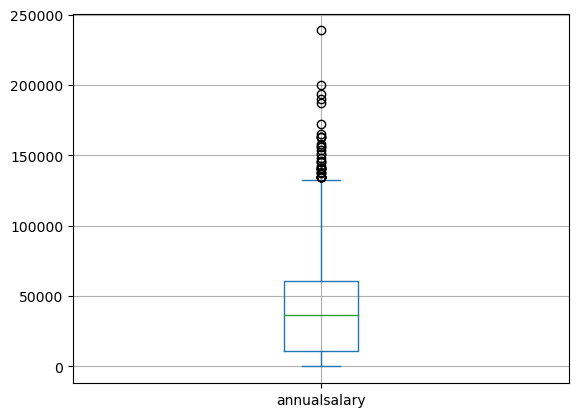

In [30]:
newdf.annualsalary.plot.box()
plt.grid()

<Axes: xlabel='jobtitle'>

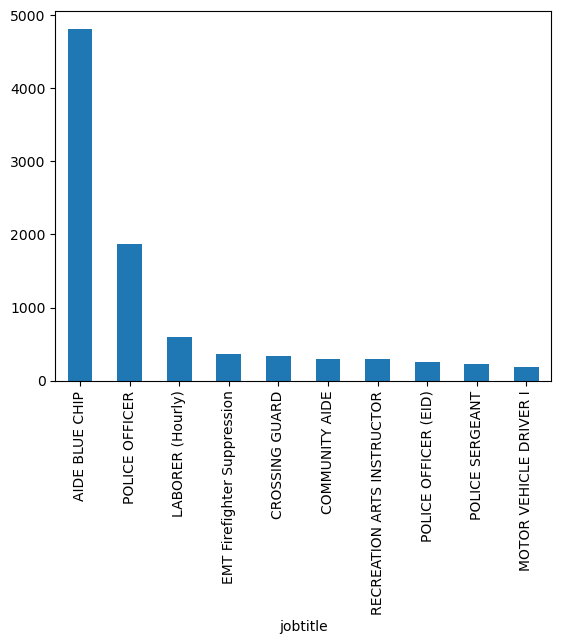

In [31]:
#plot top 10 jobs based on hiring
newdf.jobtitle.value_counts().head(10).plot.bar()

Text(0, 0.5, 'annualsalary')

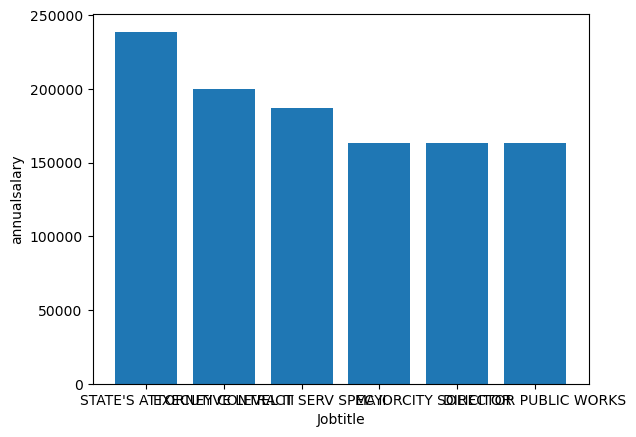

In [32]:
#plot top 10 jobs with the highest salary
x=newdf.sort_values(by='annualsalary',ascending=False)['jobtitle'].head(10)
y=newdf.sort_values(by='annualsalary',ascending=False)['annualsalary'].head(10)
plt.bar(x,y)
plt.xlabel('Jobtitle')
plt.ylabel('annualsalary')
                                                     

<Axes: xlabel='agencyid'>

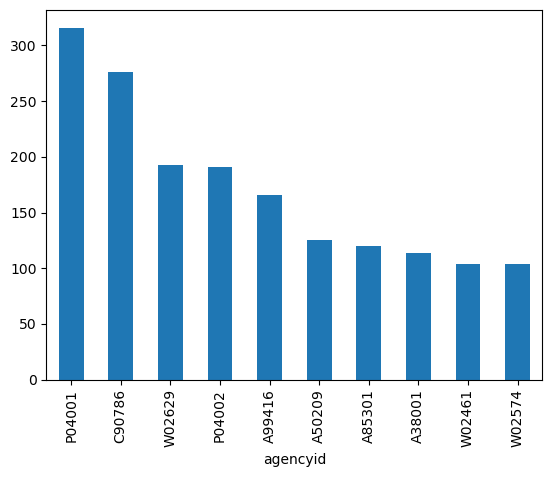

In [33]:
#plot top 10 agency's ID that has highest number of Employees
newdf.agencyid.value_counts().head(10).plot.bar()

Text(0, 0.5, 'annualsalary')

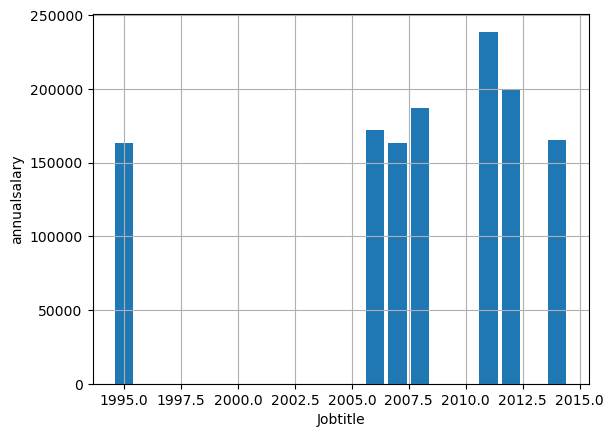

In [34]:
#plot highest salary V/s year graph
plt.grid()
x=newdf.sort_values(by='annualsalary',ascending=False)['hireyear'].head(10)
y=newdf.sort_values(by='annualsalary',ascending=False)['annualsalary'].head(10)
plt.bar(x,y)
plt.xlabel('Jobtitle')
plt.ylabel('annualsalary')

In [35]:
newdf.sort_values(by='annualsalary',ascending=False)[['hireyear',"annualsalary"]].head(10)

,hireyear,annualsalary
1229,2011,238772.0
3177,2012,200000.0
991,2012,193800.0
1350,2012,190000.0
16355,2008,187200.0
13053,2006,172000.0
5698,2014,165000.0
13841,1995,163365.0
12595,2007,163200.0
3277,2011,163200.0


In [44]:
#plot average salary V/s Year Graph
newdf.sort_values(by='annualsalary',ascending=False)["annualsalary"].mean() #[['hireyear',"annualsalary"]].head(10)

39756.791967757235

<Axes: xlabel='hiremonth'>

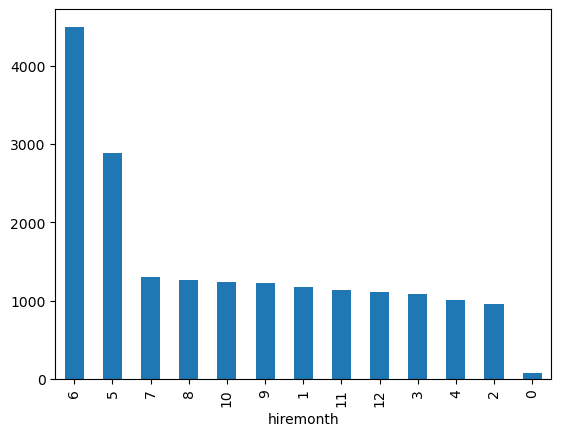

In [36]:
#plot a graph to check on which month of the people are hired 
newdf.hiremonth.value_counts().plot.bar()

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Program

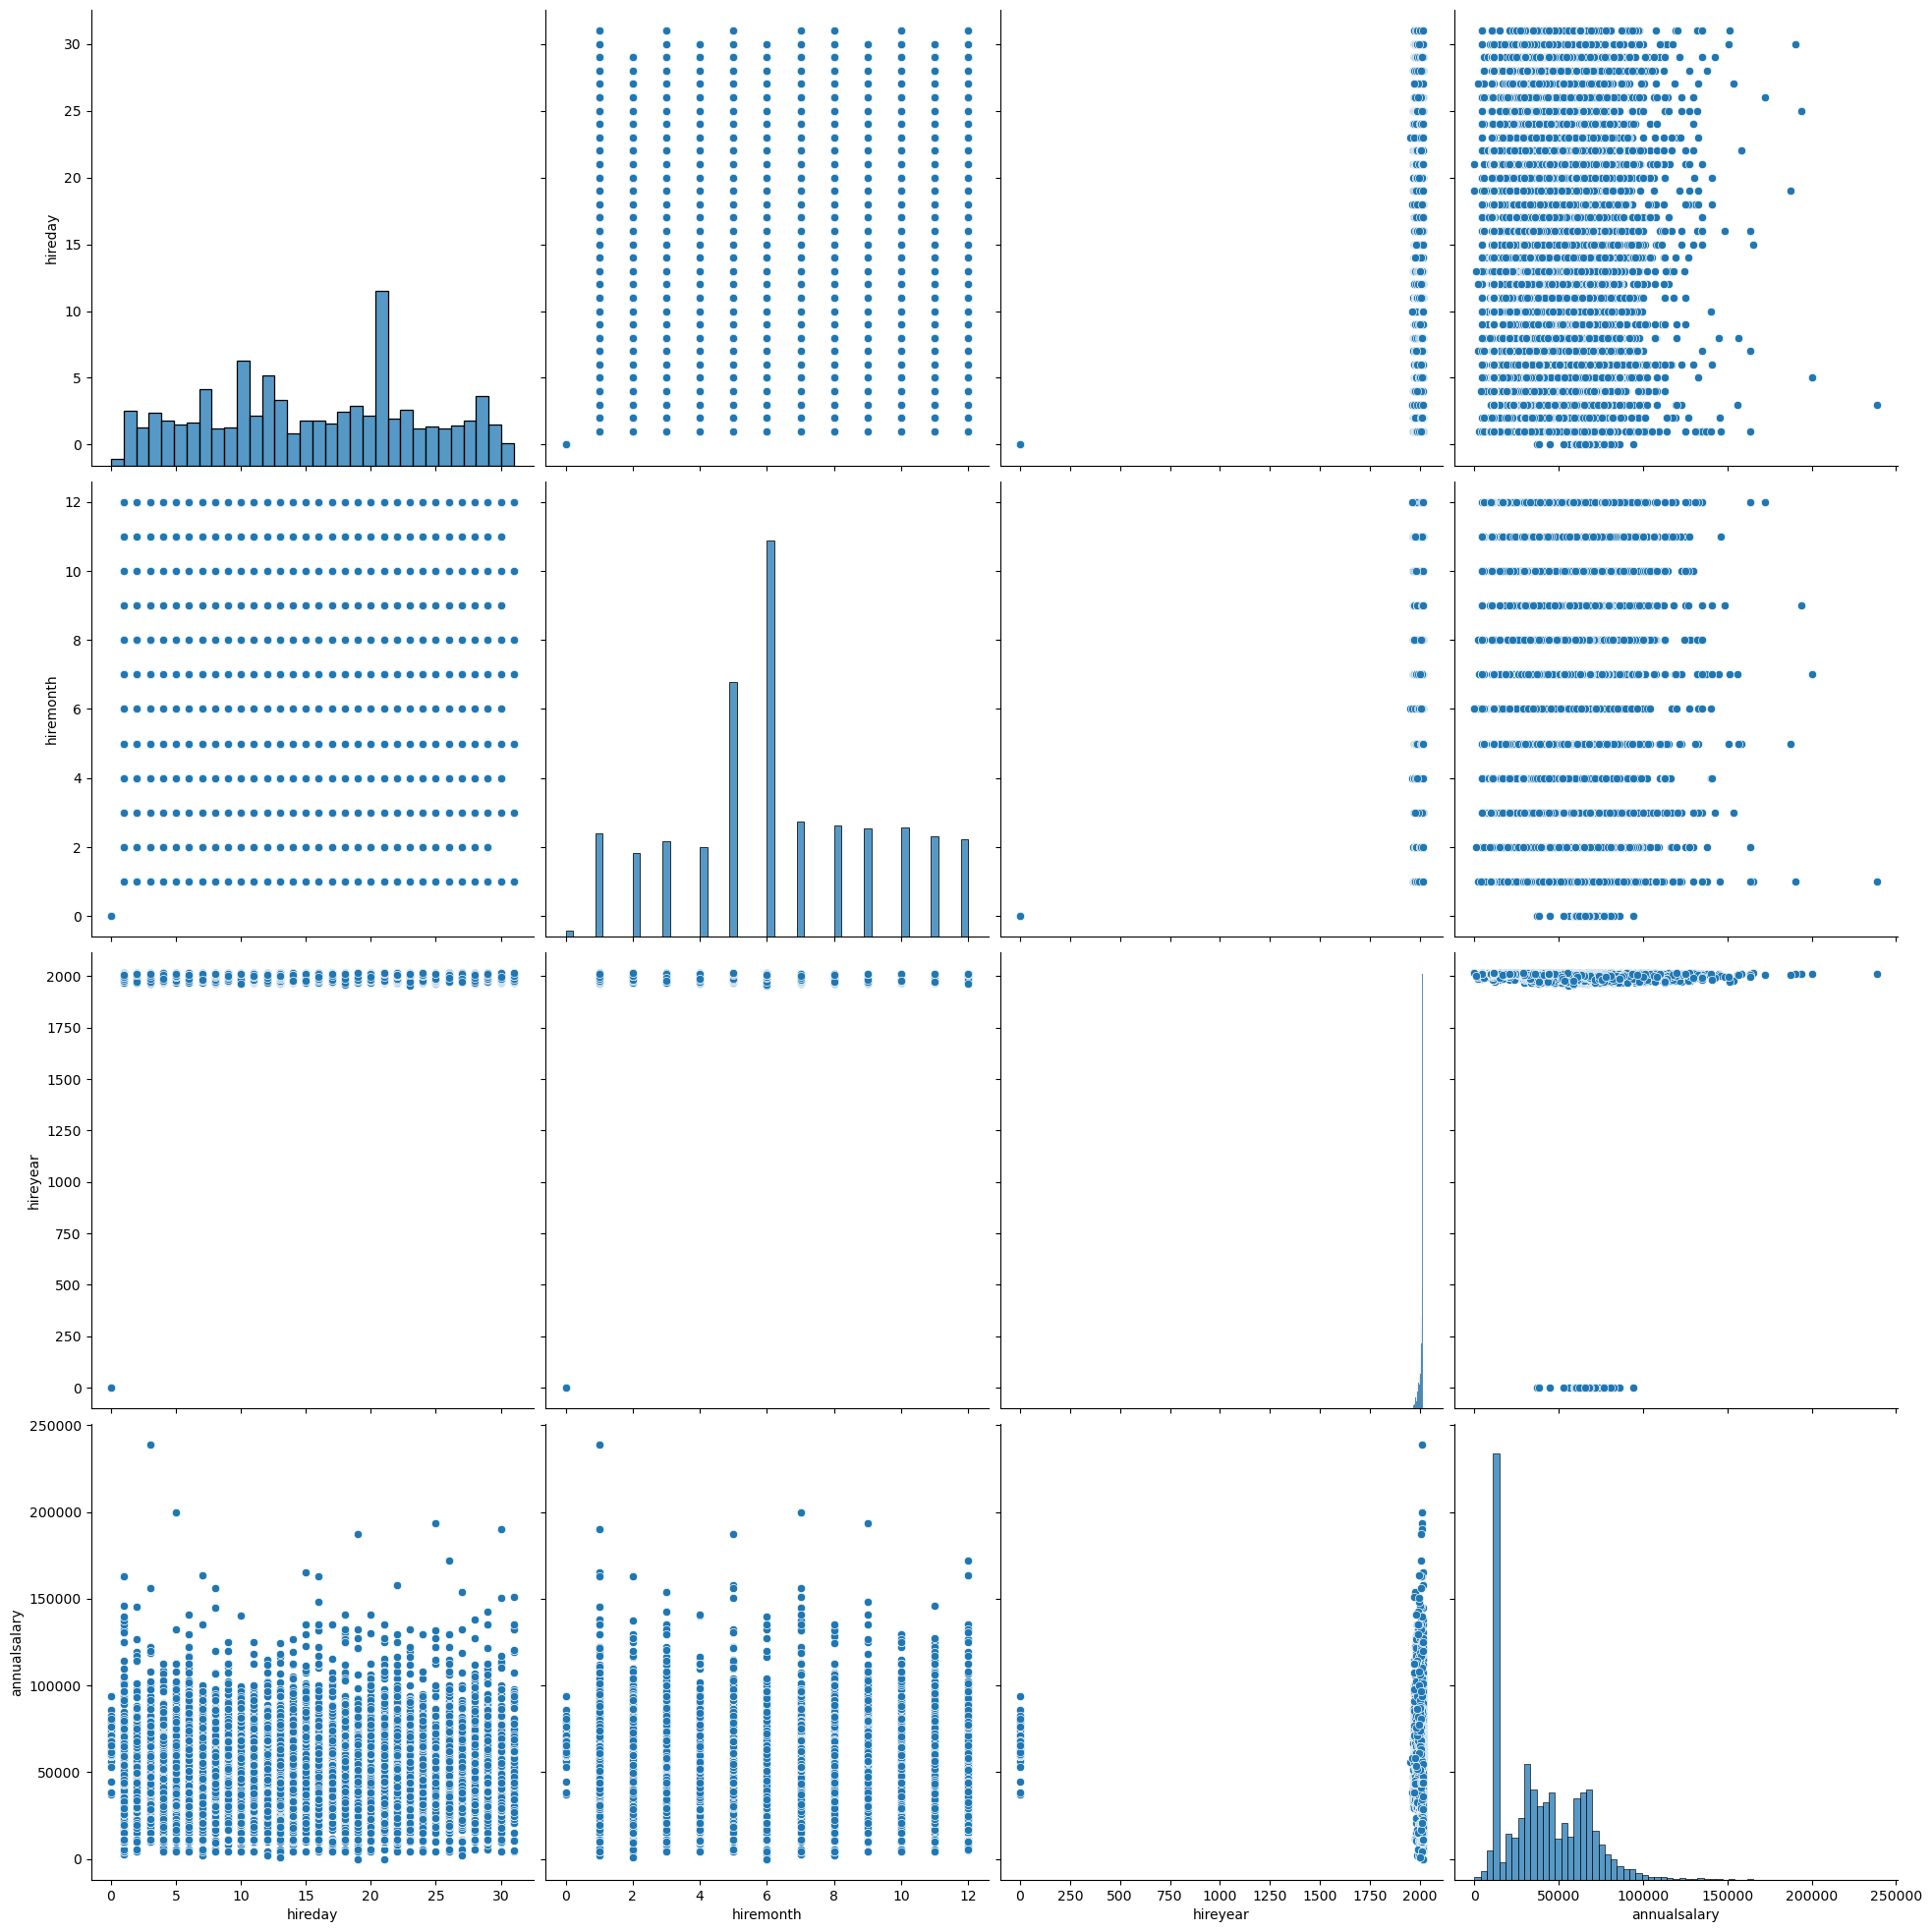

In [37]:
#plot a pairplot
sns.pairplot(newdf,size=5)

<Axes: >

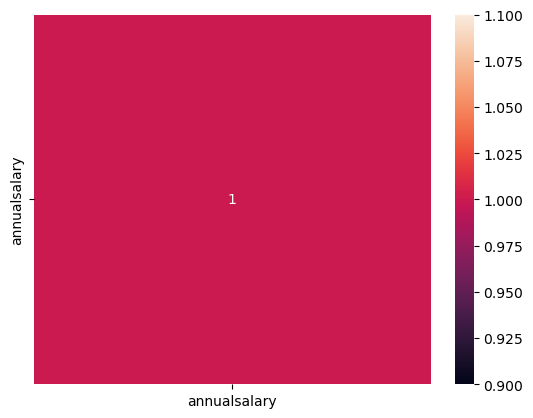

In [38]:
#plot a heatmap
sns.heatmap(data=newdf[['annualsalary']].corr(),annot=True)

# MACHINE LEARNING

#Training and Testing data 

In [39]:
newdf.head()

,name,jobtitle,agencyid,agency,hireday,hiremonth,hireyear,annualsalary
0,"Aaron,Keontae E",AIDE BLUE CHIP,W02200,Youth Summer,10,6,2013,11310.0
1,"Aaron,Patricia G",Facilities/Office Services II,A03031,OED-Employment Dev,24,10,1979,53428.0
2,"Aaron,Petra L",ASSISTANT STATE'S ATTORNEY,A29005,States Attorneys Office,25,9,2006,68300.0
3,"Abaineh,Yohannes T",EPIDEMIOLOGIST,A65026,HLTH-Health Department,23,7,2009,62000.0
4,"Abbene,Anthony M",POLICE OFFICER TRAINEE,A99416,Police Department,24,7,2013,43999.0


In [94]:
#newdf.iloc[:,-1]

In [89]:
# Feature and target
x=newdf.iloc[:,4:-1].values
y=newdf.iloc[:,-1].values

#without Data Processing -feature scaling

In [63]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=100)

#Choosing the model

In [64]:
model=SVR(kernel='rbf')

#trained the model

In [65]:
model.fit(x_train,y_train)

SVR()

#test the model

In [66]:
y_pred=model.predict(x_test)

#Performance matrics

In [67]:
#Accuracy  
model.score(x_test,y_test)

-0.019215952843460338

In [70]:
r2_score(y_test,y_pred)

-0.019215952843460338

In [71]:
mean_squared_error(y_test,y_pred)

656367383.7361821

In [72]:
mean_absolute_error(y_test,y_pred)

20764.569622634343

 Data Processing -feature scaling

In [73]:
stanscale=StandardScaler()

In [75]:
x

array([[  10,    6, 2013],
       [  24,   10, 1979],
       [  25,    9, 2006],
       ...,
       [  17,   12, 2013],
       [  23,    1, 2013],
       [  15,   10, 1979]])

In [91]:
x.shape

(18981, 3)

In [92]:
y.shape

(18981,)

In [94]:
y=stanscale.fit_transform(y.reshape(-1,1))

In [95]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=100)

In [96]:
x_train.shape

(15184, 3)

In [97]:
y_train.shape

(15184, 1)

In [99]:
x_test.shape

(3797, 3)

In [100]:
y_test.shape

(3797, 1)

###### Trained the model

In [101]:
model.fit(x_train,y_train)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

###### Prediction

In [102]:
y_pred=model.predict(x_test)

###### testing the model

#reverse the scaling

In [105]:
y_pred=stanscale.inverse_transform(y_pred.reshape(-1, 1))
y_test=stanscale.inverse_transform(y_test)

In [108]:
model.score(x_test,y_test)

-2.4712858756382206

In [109]:
r2_score(y_test,y_pred)

0.19170019420629592

In [110]:
mean_squared_error(y_test,y_pred)

520538976.3799768

In [111]:
mean_absolute_error(y_test,y_pred)

17800.736507864658

#conclusion